# Statistical testing - UX impact on Gender

In [43]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

Load the brain_size.csv dataset on a pandas DataFrame. Notice that a normal pd.read_csv won't work because the separators aren't commas, and beware of null values. This is the expected output of df.dtypes:


In [44]:
df = pd.read_csv('brain_size.csv', sep=';', index_col=0) 
df.head() 

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,.,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [45]:
df.dtypes # Checking if columns have  object values

Gender       object
FSIQ          int64
VIQ           int64
PIQ           int64
Weight       object
Height       object
MRI_Count     int64
dtype: object

In [46]:
df.describe()

,FSIQ,VIQ,PIQ,MRI_Count
count,40.000000,40.000000,40.00000,4.000000e+01
mean,113.450000,112.350000,111.02500,9.087550e+05
std,24.082071,23.616107,22.47105,7.228205e+04
min,77.000000,71.000000,72.00000,7.906190e+05
25%,89.750000,90.000000,88.25000,8.559185e+05
50%,116.500000,113.000000,115.00000,9.053990e+05
75%,135.500000,129.750000,128.00000,9.500780e+05
max,144.000000,150.000000,150.00000,1.079549e+06


In [47]:
# Data cleaning ".", filling them with the average of the column

In [48]:
df.loc[(df['Height'] =='.')]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
21,Male,83,83,86,.,.,892420


In [49]:
df.loc[(df['Weight'] =='.')]

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
2,Male,140,150,124,.,72.5,1001121
21,Male,83,83,86,.,.,892420


In [50]:
# Replacing the "." values with na 

In [51]:
df['Weight'] = df['Weight'].replace('.', np.nan) 
df['Height'] = df['Height'].replace('.', np.nan) 
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143,73.3,1038437
4,Male,133,129,128,172,68.8,965353
5,Female,137,132,134,147,65.0,951545


In [52]:
# Transforming "Height" and "Weight"columns in int values

In [53]:
df['Weight'] = df['Weight'].astype(float) 
df['Height'] = df['Height'].astype(float) 
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [54]:
# Replacing the NaN values with the mean of the column 
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].describe()

count     40.000000
mean     151.052632
std       22.868574
min      106.000000
25%      135.750000
50%      147.500000
75%      172.000000
max      192.000000
Name: Weight, dtype: float64

In [55]:
df.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.000000,64.5,816932
2,Male,140,150,124,151.052632,72.5,1001121
3,Male,139,123,150,143.000000,73.3,1038437
4,Male,133,129,128,172.000000,68.8,965353
5,Female,137,132,134,147.000000,65.0,951545


In [56]:
df.dtypes # Df cleaned with Float instead of Object - Ready to run plots

Gender        object
FSIQ           int64
VIQ            int64
PIQ            int64
Weight       float64
Height       float64
MRI_Count      int64
dtype: object

### Plot the histogram and kernel density estimation of the Verbal IQ (VIQ), both in the same axes. Pay attention to the y scale, and adapt the code accordingly.

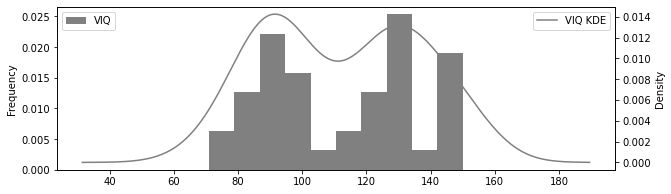

In [85]:
fig, ax = plt.subplots(figsize= (10,3)) 
 
df["VIQ"].plot.hist(alpha=1, density = True, color = "gray") 
ax_kde = ax.twinx() 
df["VIQ"].plot.kde(label = "VIQ KDE", ax=ax_kde, color= "gray") 
ax.legend(loc=2) 
ax_kde.legend(loc=1) 

### Repeat the same plot, but arrange the Verbal IQ (VIQ), Performance IQ (PIQ), and Full-scale IQ (FSIQ) in a 1x3 grid (1 row, 3 columns)

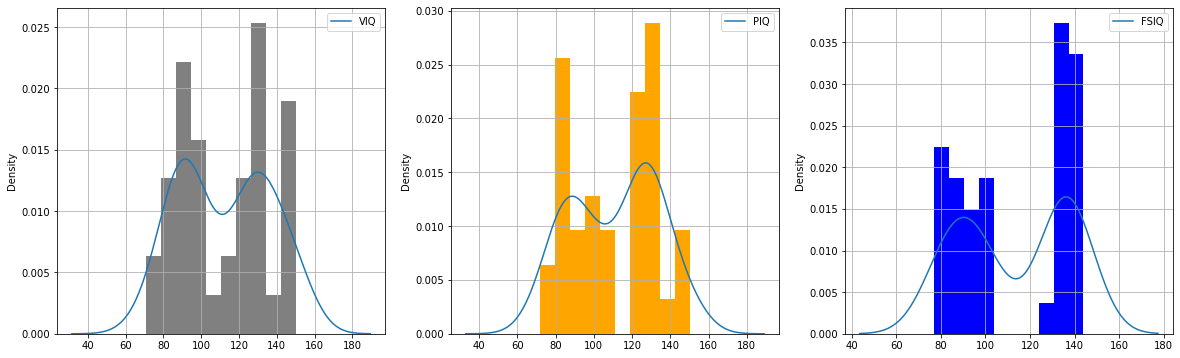

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
 
 
 
df['VIQ'].plot.kde(ax=axes[0])
 
df['VIQ'].hist(alpha=1, density=True, ax=axes[0], color='gray')
 
 
axes[0].legend()
 
 
df['PIQ'].plot.kde(ax=axes[1])
 
df['PIQ'].hist(alpha=1,density=True, ax=axes[1], color='orange')
 
 
axes[1].legend()
 
 
df['FSIQ'].plot.kde(ax=axes[2])
 
df['FSIQ'].hist(alpha=1, density=True, ax=axes[2], color='blue')

axes[2].legend()

### Compute the mean VIQ for men and women. Which one is higher, numerically?

In [96]:
df['VIQ'].groupby(df['Gender']).mean().to_frame()

,VIQ
Gender,
Female,109.45
Male,115.25


### Is there enough evidence to conclude that gender influences the VIQ? Compute a T-test using `scipy.stats.ttest_ind` to find out. Display the p-value and write down your conclusion in plain English (i.e. spell the meaning of the resulting p-value).

In [113]:
VIQ_male = df.loc[df['Gender'] == 'Male', 'VIQ']
VIQ_male

2     150
3     123
4     129
9      93
10    114
12    150
13    129
18     96
20     77
21     83
22    107
24    145
26    145
28     96
32    145
33     96
34     96
37    150
39     90
40     91
Name: VIQ, dtype: int64

In [114]:
VIQ_female = df.loc[df['Gender'] == 'Female', 'VIQ']
VIQ_female

1     132
5     132
6      90
7     136
8      90
11    129
14    120
15    100
16     71
17    132
19    112
23    129
25     86
27     90
29     83
30    126
31    126
35     90
36    129
38     86
Name: VIQ, dtype: int64

In [115]:
# Running a T-test 
from scipy import stats 

In [131]:
t_test_VIQ = stats.ttest_ind(VIQ_male, VIQ_female)
t_test_VIQ

Ttest_indResult(statistic=0.7726161723275011, pvalue=0.44452876778583217)

In [132]:
if t_test_VIQ.pvalue <0.05:
    print('Theres enough evidence to conclude that the gender influences the VIQ')
else:
    print('Theres not enough evidence to conclude that the gender influences the VIQ' )


Theres not enough evidence to conclude that the gender influences the VIQ


### Repeat the operation for the other two IQ measures.

In [133]:
PIQ_female = df.loc[df['Gender'] == 'Female', 'PIQ']
PIQ_male = df.loc[df['Gender'] == 'Male', 'PIQ']

In [134]:
t_test_PIQ = stats.ttest_ind(PIQ_male, PIQ_female)
t_test_PIQ

Ttest_indResult(statistic=0.15980113150762698, pvalue=0.8738841403250049)

In [138]:
if t_test_PIQ.pvalue <0.05:
    print('Theres enough evidence to conclude that the gender influences the PIQ')
else:
    print('Theres not enough evidence to conclude that the gender influences the PIQ' )


Theres not enough evidence to conclude that the gender influences the PIQ


In [139]:
FSIQ_female = df.loc[df['Gender'] == 'Female', 'FSIQ']
FSIQ_male = df.loc[df['Gender'] == 'Male', 'FSIQ']

In [140]:
t_test_FSIQ = stats.ttest_ind(FSIQ_male, FSIQ_female)
t_test_FSIQ

Ttest_indResult(statistic=0.4026724743703011, pvalue=0.6894456253897778)

In [141]:
if t_test_FSIQ.pvalue <0.05:
    print('Theres enough evidence to conclude that the gender influences the FSIQ')
else:
    print('Theres not enough evidence to conclude that the gender influences the FSIQ' )


Theres not enough evidence to conclude that the gender influences the FSIQ


### PIQ, VIQ, and FSIQ give 3 measures of IQ. Are FISQ and PIQ significantly different? Use `scipy.stats.ttest_rel` to find out, and write down the p-value and the conclusion in plain English.

In [143]:
ttest_rel = stats.ttest_rel(df['PIQ'], df['FSIQ'])
ttest_rel

Ttest_relResult(statistic=-1.7842019405859857, pvalue=0.08217263818364236)

In [144]:
if ttest_rel.pvalue <0.05:
    print('Theres enough evidence to conclude that FISQ and PIQ significantly different')
else:
    print('Theres not enough evidence to conclude that FISQ and PIQ significantly different' )


Theres not enough evidence to conclude that FISQ and PIQ significantly different


### What are the mean and standard deviation of the Gaussian distribution that best approximates the female heights? Use `stats.norm.fit` for that.

In [165]:
female_average_height = df.loc[df['Gender'] == 'Female', 'Height']
female_average_height.describe()

count    20.000000
mean     65.765000
std       2.288248
min      62.000000
25%      64.500000
50%      66.000000
75%      66.875000
max      70.500000
Name: Height, dtype: float64

In [166]:
norm_female = stats.norm.fit(female_average_height)
norm_female

(65.765, 2.2303082746562186)

### Instatiate a Gaussian distribution with the mean and standard deviation values computed before. Are the female heights really distributed along this distribution? Use `scipy.stats.kstest` to find out, and write down the p-value and the conclusion in plain English.



In [167]:
gaussian_fem = stats.norm(norm_female[0], norm_female[1])

In [168]:
ktest_fem = stats.kstest(female_average_height,gaussian_fem.rvs(20))
ktest_fem

KstestResult(statistic=0.3, pvalue=0.33559098126008213)

In [164]:
if ktest_fem.pvalue <0.05:
    print('Theres enough evidence to conclude that the female height follows a Gaussian distribution')
else:
    print('Theres not enough evidence to conclude that the female height follows a Gaussian distribution' )


Theres not enough evidence to conclude that the female height follows a Gaussian distribution


### Plot the Probability Density Function (PDF) of the distribution above. On the same axes, plot the Kernel Density Estimation (KDE) of the female heights. The expected result looks like this:

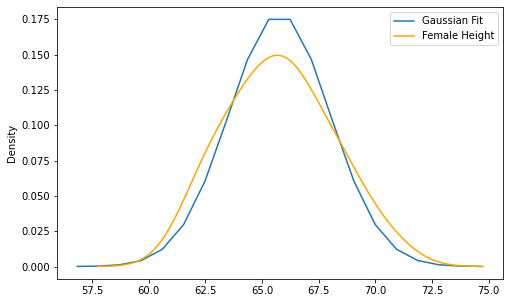

In [170]:
fig, ax = plt.subplots(figsize=(8,5)) 
PDF = np.linspace(norm_female[0] - 4*norm_female[1], norm_female[0] + 4*norm_female[1], num=len(female_average_height)) 
plt.plot(PDF, stats.norm.pdf(PDF, norm_female[0], norm_female[1]), label = 'Gaussian Fit')  
female_average_height.plot.kde(ax=ax, label='Female Height', color ="orange") 
plt.legend()